In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell

In [2]:
# Libraries Settings
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=Warning)
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline
np.set_printoptions(suppress=True)

def set_seed(seed=42):
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    
pd.set_option("display.width", 100)
pd.set_option("display.max_columns", 60)
pd.set_option("display.max_rows", 25)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

In [3]:
# plot function
def numerical_plotting(data, col, title, symb, ylabel, color):
    fig, ax = plt.subplots(2, 1, 
                           sharex=True, 
                           figsize=(20, 8),
                           facecolor="#FFFFFF",
                           gridspec_kw={"height_ratios": (.2, .8)})
    
    ax[0].set_facecolor("#FFFFFF")
    ax[1].set_facecolor("#FFFFFF")
    
    ax[0].set_title(title, 
                    weight="bold", 
                    fontsize=30, 
                    pad=30)
    
    sns.boxplot(x=col, 
                data=data,
                color=color,
                ax=ax[0])
    
    ax[0].set(yticks=[])
    
    sns.distplot(data[col], kde=True, color=color)
    
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    
    ax[0].set_xlabel(col, weight="bold", fontsize=15, labelpad=15)
    ax[1].set_xlabel(col, weight="bold", fontsize=15)
    ax[1].set_ylabel(ylabel, weight="bold", fontsize=15)
    
    plt.axvline(data[col].mean(), 
                color='darkgreen', 
                linewidth=2.2, 
                label='mean=' + str(np.round(data[col].mean(),1)) + symb)
    plt.axvline(data[col].median(), 
                color='red', 
                linewidth=2.2, 
                label='median='+ str(np.round(data[col].median(),1)) + symb)
    plt.axvline(data[col].max(), 
                color='blue', 
                linewidth=2.2, 
                label='max='+ str(np.round(data[col].max(),1)) + symb)
    plt.axvline(data[col].min(), 
                color='orange', 
                linewidth=2.2, 
                label='min='+ str(np.round(data[col].min(),1)) + symb)
    plt.axvline(data[col].mode()[0], 
                color='purple', 
                linewidth=2.2, 
                label='mode='+ str(data[col].mode()[0]) + symb)
    
    
    plt.legend(bbox_to_anchor=(1, 1), 
               ncol=1, 
               fontsize=17, 
               fancybox=True, 
               shadow=True, 
               frameon=False)
    
    plt.tight_layout()
    plt.show()
    
def count_pie_plot(datapie, datacount, colpiey, colcount, text1, text2, piecomap,
                   xlabel, ylabel, xticklabel, yticklabel, ystart, yend, pielabels, yplus, 
                   piefs=10, countcomap=None, pctdistance=0.65, fontsize=15, xtickrotation=None):

    # Subplots
    fig, (ax1, ax2) = plt.subplots(ncols=2, 
                                   nrows=1, 
                                   facecolor=("#FFFFFF"),
                                   figsize=(24, 8))

    datapie.plot(kind="pie", 
                 y=colpiey,
                 autopct='%1.1f%%',
                 labels=None,
                 startangle=90,
                 colors=piecomap,
                 wedgeprops=dict(width=0.15),
                 pctdistance=pctdistance,
                 fontsize=piefs,
                 ax=ax1,
                 textprops=dict(color="black", 
                                weight="bold"))
    
    sns.countplot(x=colcount,
                  data=datacount,
                  palette=countcomap,
                  ax=ax2)

    #title
    x0, x1 = ax1.get_xlim()
    y0, y1 = ax1.get_ylim()
    
    ax1.text(x0, y1 * 1.40, 
             text1, 
             fontsize=30, 
             ha="left", 
             va="center", 
             weight="bold")
    ax1.text(x0, y1 * 1.25, 
             text2, 
             fontsize=18, 
             ha="left", 
             va="center")
    
    ax1.legend(pielabels, 
               loc="upper left", 
               bbox_to_anchor=(x0*0.01, y1*0.85), 
               prop={'size': 10.5}, frameon=False, ncol=len(datapie))
    
    ax2.set_xlabel(xlabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_ylabel(ylabel,
                   weight="bold",
                   labelpad=15,
                   fontsize=15)

    ax2.set_xticklabels(labels=xticklabel,
                        weight="semibold",
                        fontsize=10,
                        rotation=xtickrotation)
    ax2.set_yticklabels(labels=yticklabel,
                        weight="semibold",
                        fontsize=10)

    # data label
    i=0

    for p in ax2.patches:
        value = f"{p.get_height()}"
        if (i < 2):
            y1 = -2
        else:
            y1 = 2
        i += 1
        x = p.get_x() + p.get_width() / 2 
        y = p.get_y() + p.get_height() + yplus
        ax2.text(x, y, value, ha="center", va="center", fontsize=15, weight="semibold") 

    ax2.set_ylim(ystart, yend)
    ax2.set_facecolor("#FFFFFF")
    ax1.set_ylabel(None)
    
    plt.tight_layout()
    return fig

def countplot_y(data, xplus, coly, sizey, text1, text2, 
                xlabel, ylabel, xstart, xend, ytimes1, ytimes2):

    fig, ax = plt.subplots(ncols=1,
                           nrows=1,
                           facecolor=("#FFFFFF"),
                           figsize=(24, sizey))

    sns.countplot(y=coly,
                  data=data,
                  palette=['#E0144C', '#FF5858', '#3AB0FF', '#FFB562', '#6FEDD6', '#6D9885'],
                  ax=ax)

    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()

    ax.text(x0, y1 * ytimes1, 
            text1, fontsize=30, 
            ha="left", va="center", weight="bold")
    ax.text(x0, y1 * ytimes2, 
            text2, fontsize=18, 
            ha="left", va="center")

    plt.xticks(weight="bold",
               fontsize=10)
    plt.yticks(weight="bold",
               fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=25, labelpad=20)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=25, labelpad=20)

    # data label
    i=0

    for p in ax.patches:
        value = f'{p.get_width()}'
        if i < 7:
            x1 = -1.2
        else:
            x1 = 1.2

        i+=1
        x = p.get_x() + p.get_width() + xplus
        y = p.get_y() + p.get_height() -.4
        ax.text(x, y, value, ha='center', va='center', fontsize=15, weight='semibold') 

    plt.tight_layout()
    ax.set_xlim(xstart, xend)
    ax.set_facecolor("#FFFFFF")
    
    return fig

def bivariate_numerical_plot(data, x, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(20, 6), 
                           facecolor="#FFFFFF")
    sns.kdeplot(data=data, 
                x=x, 
                hue=hue, 
                fill=True)
    
    ax.set_facecolor("#FFFFFF")
    
    plt.title(title, weight="bold", 
              fontsize=25, pad=30)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=15, labelpad=15)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=15, labelpad=15)
    plt.tight_layout()
    plt.show()
    
def mtvboxplot(data, x, y, hue, title, xlabel, ylabel):
    fig, ax = plt.subplots(1, 1,
                           figsize=(24, 8))
    sns.boxplot(x=x, y=y, hue=hue, 
                data=data, ax=ax)
    plt.title(title, weight="bold", 
              fontsize=25, pad=25)
    plt.xticks(weight="bold", fontsize=10)
    plt.yticks(weight="bold", fontsize=10)
    plt.xlabel(xlabel, weight="bold", 
               fontsize=15, labelpad=10)
    plt.ylabel(ylabel, weight="bold", 
               fontsize=15, labelpad=10)
    plt.tight_layout()
    plt.show()

In [4]:
# stat function

def spearman_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Spearman's Correlation
    coef, p = stats.spearmanr(data1, data2)
    print(f"Spearmans correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()
    
def pearson_correlation(data1, data2, title):
    print("-" * 15, title, "-" * 15)
    print()
    # calculate Pearson's Correlation
    coef, p = stats.pearsonr(data1, data2)
    print(f"Pearson correlation coefficient: {coef:.3f}")
    print()
    # interpret the significance
    alpha = 0.05
    if (p > alpha):
        print(f"Samples are uncorrelated (fail to reject H0) p={p:.3f}")
    else:
        print(f"Samples are correlated (reject H0) p={p:.3f}")
    print()
    
def skew_kurtosis(data, title):
    skw = stats.skew(data, bias=False)
    kurt = stats.kurtosis(data, bias=False)
    
    print("-" * 20, title, "-" * 20)
    print(f"Skewness: {skw}")
    if (skw < -1) and (skw > 1):
        print("Highly skewed")
    elif (-1 < skw < -0.5) or (1 < skw < 0.5):
        print("Moderately skewed")
    elif (-0.5 < skw < 0.5):
        print("Approximately symmetric")
    print("-" * 35)
    print(f"Kurtosis: {kurt}")
    if (kurt > 1):
        print("The distribution is too peaked")
    elif (kurt < -1):
        print("The distribution is too flat")
    else:
        print("The distribution is non-normal")
    print("-" * 35)
    
def chebychev(data, title, interpret):
    mu = round(data.mean(), 1)
    s = round(data.std(), 1)
    
    fc = round(mu - (2 * s), 1)
    sc = round(mu + (2 * s), 1)
    
    print("-" * 20, f"Interpretation of {title}", "-" * 20)
    print(f"first calc: {fc}")
    print(f"second calc: {sc}")
    print(interpret)
    print("-" * 40)

### 1.4 | Dataset Problems

##### An organization wants to predict who possible defaulters are for the consumer loans product. 
##### They have data about historic customer behavior based on what they have observed. Hence when 
##### they acquire new customers they want to predict who is riskier and who is not.


In [5]:
df = pd.read_csv('data/Training Data.csv')

In [6]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [7]:
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:>

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

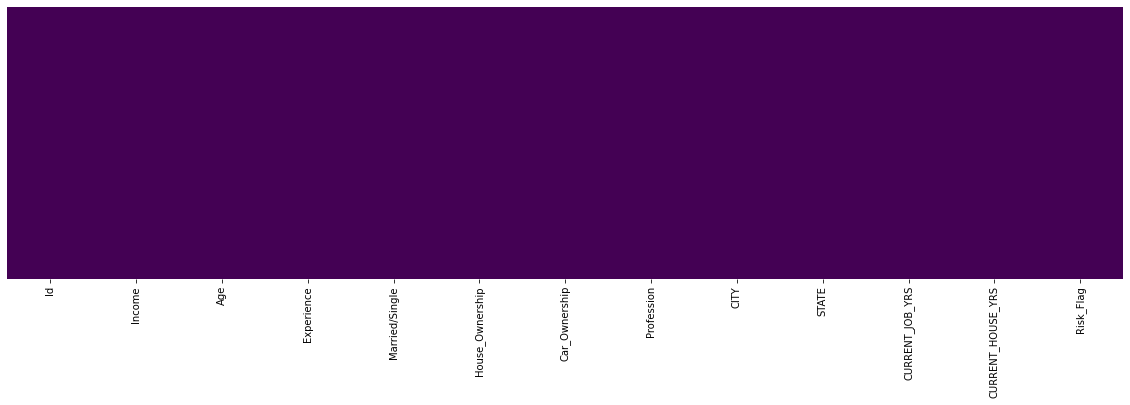

In [8]:
# plotting null values
plt.figure(figsize=(20,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.plot

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


### Uniqueness Categorical Variables
#### Let's have a look at categorical variables. How many unique values of these variables

In [10]:
categorical = df.select_dtypes(["category", "object"]).columns

In [11]:
categorical

Index(['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE'], dtype='object')

In [12]:
for cat_col in categorical:
    print(f"{cat_col}: {df[cat_col].nunique()} uniqueness variable")

Married/Single: 2 uniqueness variable
House_Ownership: 3 uniqueness variable
Car_Ownership: 2 uniqueness variable
Profession: 51 uniqueness variable
CITY: 317 uniqueness variable
STATE: 29 uniqueness variable


### Discrete and Continuous Variables
##### Let's have a look at Discrete and Continuous variables.

In [13]:
numeric = df.select_dtypes(["int", "float"]).columns

In [14]:
for num_col in numeric:
    print(f"{num_col}: {df[num_col].nunique()} uniqueness variable")

Id: 252000 uniqueness variable
Income: 41920 uniqueness variable
Age: 59 uniqueness variable
Experience: 21 uniqueness variable
CURRENT_JOB_YRS: 15 uniqueness variable
CURRENT_HOUSE_YRS: 5 uniqueness variable
Risk_Flag: 2 uniqueness variable


#### How many missing data points do we have?¶
##### Let's see how many missing data we have in each column....

In [15]:
# Get the number of missing data points per column
missing_values_count = df.isnull().sum()
# Look at the missing points in the first ten columns
missing_values_count[:10]

Id                 0
Income             0
Age                0
Experience         0
Married/Single     0
House_Ownership    0
Car_Ownership      0
Profession         0
CITY               0
STATE              0
dtype: int64

##### Great! there's no missing value! let's see the unique variables on the categorical data!

In [16]:
df.Profession.unique()

array(['Mechanical_engineer', 'Software_Developer', 'Technical_writer',
       'Civil_servant', 'Librarian', 'Economist', 'Flight_attendant',
       'Architect', 'Designer', 'Physician', 'Financial_Analyst',
       'Air_traffic_controller', 'Politician', 'Police_officer', 'Artist',
       'Surveyor', 'Design_Engineer', 'Chemical_engineer',
       'Hotel_Manager', 'Dentist', 'Comedian', 'Biomedical_Engineer',
       'Graphic_Designer', 'Computer_hardware_engineer',
       'Petroleum_Engineer', 'Secretary', 'Computer_operator',
       'Chartered_Accountant', 'Technician', 'Microbiologist',
       'Fashion_Designer', 'Aviator', 'Psychologist', 'Magistrate',
       'Lawyer', 'Firefighter', 'Engineer', 'Official', 'Analyst',
       'Geologist', 'Drafter', 'Statistician', 'Web_designer',
       'Consultant', 'Chef', 'Army_officer', 'Surgeon', 'Scientist',
       'Civil_engineer', 'Industrial_Engineer', 'Technology_specialist'],
      dtype=object)

In [17]:
df.CITY.unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar',
       'Tiruchirappalli[10]', 'Jalgaon', 'Tiruppur', 'Jamnagar',
       'Kota[6]', 'Karimnagar', 'Hajipur[31]', 'Adoni', 'Erode[17]',
       'Kollam', 'Madurai', 'Anantapuram[24]', 'Kamarhati', 'Bhusawal',
       'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad', 'Ajmer',
       'Ongole', 'Miryalaguda', 'Ambattur', 'Indore', 'Pondicherry',
       'Shimoga', 'Chennai', 'Gulbarga', 'Khammam', 'Saharanpur',
       'Gopalpur', 'Amravati', 'Udupi', 'Howrah', 'Aurangabad[39]',
       'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar', 'Bellary', 'Danapur',
       'Purnia[26]', 'Bijapur', 'Patiala', 'Malda', 'Sagar', 'Durgapur',
       'Junagadh', 'Singrauli', 'Agartala', 'Thanjavur', 'Hindupur',
       'Naihati', 'North_Dumdum', 'Panchkula', 'Anantapur', 'Serampore',
       'Bathinda', 'Nadiad', 'Kanpur', 'Haridwar', 'Berhampur',
       'Jamshedpur', 'Hyderabad', 'Bidar', 'Kottayam', 'Solapur',
       'Suryapet', 'Aizawl', 'Asansol', 'Deoghar'

In [18]:
df.STATE.unique()

array(['Madhya_Pradesh', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil_Nadu',
       'Gujarat', 'Rajasthan', 'Telangana', 'Bihar', 'Andhra_Pradesh',
       'West_Bengal', 'Haryana', 'Puducherry', 'Karnataka',
       'Uttar_Pradesh', 'Himachal_Pradesh', 'Punjab', 'Tripura',
       'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam',
       'Jammu_and_Kashmir', 'Delhi', 'Chhattisgarh', 'Chandigarh',
       'Uttar_Pradesh[5]', 'Manipur', 'Sikkim'], dtype=object)

##### Note:
###### We can see above that there are many City names and also State that have a parantheses 
###### bracket characters and numbers that are not clear what they mean, let's clean that up later.

###### This dataset column is very inconsistent and neat, this can cause confusion or typing errors
###### in the future, let's change it so we can more easily analyze and predict it later.

## Data Cleaning
### 4.1 Checking and cleaning

In [19]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single', 'House_Ownership', 'Car_Ownership',
       'Profession', 'CITY', 'STATE', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [20]:
df.columns = df.columns.str.lower()
df.columns

Index(['id', 'income', 'age', 'experience', 'married/single', 'house_ownership', 'car_ownership',
       'profession', 'city', 'state', 'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

In [21]:
df.rename(columns={"married/single": "married_single"}, inplace=True)
df.columns

Index(['id', 'income', 'age', 'experience', 'married_single', 'house_ownership', 'car_ownership',
       'profession', 'city', 'state', 'current_job_yrs', 'current_house_yrs', 'risk_flag'],
      dtype='object')

##### Great! now into the city and state variables, let's clean the characters!

In [22]:
df.city = df.city.str.extract("([A-Za-z]+)")
df.city.unique()

array(['Rewa', 'Parbhani', 'Alappuzha', 'Bhubaneswar', 'Tiruchirappalli',
       'Jalgaon', 'Tiruppur', 'Jamnagar', 'Kota', 'Karimnagar', 'Hajipur',
       'Adoni', 'Erode', 'Kollam', 'Madurai', 'Anantapuram', 'Kamarhati',
       'Bhusawal', 'Sirsa', 'Amaravati', 'Secunderabad', 'Ahmedabad',
       'Ajmer', 'Ongole', 'Miryalaguda', 'Ambattur', 'Indore',
       'Pondicherry', 'Shimoga', 'Chennai', 'Gulbarga', 'Khammam',
       'Saharanpur', 'Gopalpur', 'Amravati', 'Udupi', 'Howrah',
       'Aurangabad', 'Hospet', 'Shimla', 'Khandwa', 'Bidhannagar',
       'Bellary', 'Danapur', 'Purnia', 'Bijapur', 'Patiala', 'Malda',
       'Sagar', 'Durgapur', 'Junagadh', 'Singrauli', 'Agartala',
       'Thanjavur', 'Hindupur', 'Naihati', 'North', 'Panchkula',
       'Anantapur', 'Serampore', 'Bathinda', 'Nadiad', 'Kanpur',
       'Haridwar', 'Berhampur', 'Jamshedpur', 'Hyderabad', 'Bidar',
       'Kottayam', 'Solapur', 'Suryapet', 'Aizawl', 'Asansol', 'Deoghar',
       'Eluru', 'Ulhasnagar', 'Aligarh'

##### Great! now state variable

In [23]:
df.state = df.state.str.extract("([A-Za-z]+)")
df.state.unique()

array(['Madhya', 'Maharashtra', 'Kerala', 'Odisha', 'Tamil', 'Gujarat',
       'Rajasthan', 'Telangana', 'Bihar', 'Andhra', 'West', 'Haryana',
       'Puducherry', 'Karnataka', 'Uttar', 'Himachal', 'Punjab',
       'Tripura', 'Uttarakhand', 'Jharkhand', 'Mizoram', 'Assam', 'Jammu',
       'Delhi', 'Chhattisgarh', 'Chandigarh', 'Manipur', 'Sikkim'],
      dtype=object)

#### 4.2 Random Under-Sampling

In [24]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.
# Lets shuffle the data before creating the subsamples
df = df.sample(frac=1)

In [25]:
# amount of fraud classes 492 rows.
risk_data = df.loc[df["risk_flag"] == 1]
not_risk_data = df.loc[df["risk_flag"] == 0][:30996]

normal_distributed_data = pd.concat([risk_data, not_risk_data])

In [26]:
# Shuffle dataframe rows
loan = normal_distributed_data.sample(frac=1, random_state=42)

loan.head()

,id,income,age,experience,married_single,house_ownership,car_ownership,profession,city,state,current_job_yrs,current_house_yrs,risk_flag
234422,234423,8163964,26,16,single,rented,no,Chef,Thanjavur,Tamil,13,10,0
210748,210749,3367218,28,5,single,rented,no,Analyst,Raiganj,West,4,11,0
206557,206558,5570090,74,1,single,rented,no,Politician,Bardhaman,West,1,11,0
245081,245082,265595,69,7,single,rented,no,Technical_writer,Unnao,Uttar,4,11,1
243491,243492,9774235,75,11,single,rented,no,Statistician,Srikakulam,Andhra,7,12,1


#### 4.3 | Equally Distributing and Correlating

Distribution of the risk_flag in the subsample dataset
0   0.500
1   0.500
Name: risk_flag, dtype: float64


<AxesSubplot:xlabel='risk_flag', ylabel='count'>

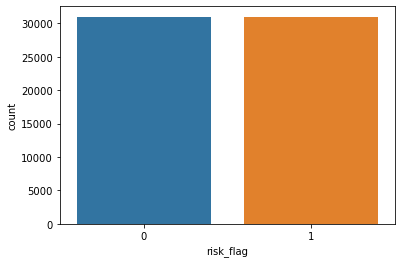

In [27]:
print("Distribution of the risk_flag in the subsample dataset")
print(loan["risk_flag"].value_counts() / len(loan))

# sns.countplot("risk_flag", data=loan)
# plt.title('Equally Distributed Risk Flag', fontsize=14);

sns.countplot(x=loan["risk_flag"])
plt.show()

##### Now that we have our dataframe correctly balanced, we can go further with our analysis and data preprocessing.

### 5. | Data Analysis

##### 5.1 | Descriptive Statistics

In [28]:
loan.describe(exclude=[np.number])

,married_single,house_ownership,car_ownership,profession,city,state
count,61992,61992,61992,61992,61992,61992
unique,2,3,2,51,316,28
top,single,rented,no,Physician,Srinagar,Uttar
freq,56111,57605,44033,1473,360,7138


In [29]:
loan.describe(include=[np.number])

,id,income,age,experience,current_job_yrs,current_house_yrs,risk_flag
count,61992.000,61992.000,61992.000,61992.000,61992.000,61992.000,61992.000
mean,128517.614,4995481.107,49.524,9.875,6.277,11.990,0.500
std,76331.842,2893451.226,17.235,6.031,3.691,1.400,0.500
min,4.000,10310.000,21.000,0.000,0.000,10.000,0.000
25%,61593.500,2477727.000,34.000,5.000,3.000,11.000,0.000
50%,128261.500,5018632.500,49.000,10.000,6.000,12.000,0.500
75%,199062.500,7516713.500,65.000,15.000,9.000,13.000,1.000
max,251994.000,9999180.000,79.000,20.000,14.000,14.000,1.000


In [30]:
# Grouping profession by its income in min, max, and mean
loan.groupby("profession")["income"].agg(["min", "max", "mean"]).sort_values(by="max", ascending=False).T

profession,Drafter,Secretary,Economist,Computer_hardware_engineer,Computer_operator,Civil_engineer,Analyst,Official,Police_officer,Biomedical_Engineer,Physician,Industrial_Engineer,Psychologist,Comedian,Chemical_engineer,Technology_specialist,Engineer,Surveyor,Hotel_Manager,Civil_servant,Technician,Magistrate,Dentist,Aviator,Web_designer,Statistician,Designer,Artist,Lawyer,Air_traffic_controller,Architect,Firefighter,Financial_Analyst,Mechanical_engineer,Scientist,Geologist,Consultant,Army_officer,Microbiologist,Software_Developer,Surgeon,Chartered_Accountant,Chef,Politician,Technical_writer,Flight_attendant,Fashion_Designer,Design_Engineer,Librarian,Petroleum_Engineer,Graphic_Designer
min,64805.000,143036.000,16890.000,13357.000,41719.000,36017.000,91459.000,13629.000,13557.000,51974.000,12608.000,21995.000,53850.000,13429.000,26926.000,23240.000,10310.000,11114.000,17801.000,11430.000,16045.000,67459.000,69549.000,130180.000,57769.000,46244.000,92747.000,31297.000,36775.000,33649.000,25096.000,29380.000,25268.000,56449.000,28561.000,62100.000,28519.000,12902.000,43418.000,51528.000,18215.000,23621.000,15016.000,98356.000,44078.000,11695.000,12766.000,53886.000,59715.000,80603.000,10675.000
max,9999180.000,9998070.000,9994882.000,9994501.000,9993961.000,9992141.000,9992133.000,9991569.000,9987955.000,9987812.000,9987805.000,9986330.000,9985964.000,9984878.000,9984718.000,9984686.000,9983889.000,9983788.000,9983764.000,9983131.000,9982680.000,9982430.000,9981314.000,9980508.000,9980350.000,9978516.000,9978110.000,9976619.000,9976302.000,9975789.000,9974540.000,9974101.000,9972303.000,9971347.000,9970052.000,9969924.000,9967854.000,9967074.000,9962662.000,9962479.000,9962127.000,9960967.000,9952217.000,9945612.000,9945173.000,9939884.000,9915463.000,9913743.000,9908353.000,9904501.000,9856462.000
mean,4344757.482,5443830.758,4823541.805,5282945.330,5035761.595,5029754.449,4871672.420,4670518.722,4466572.133,5292927.262,4762333.024,4991899.451,5265301.206,5129192.090,5594175.861,4859572.305,4629449.878,5319543.721,4847886.408,4925930.467,5136913.106,4732258.875,4957795.211,5001975.064,5135221.926,4849879.859,5366743.140,5002041.826,5141886.029,4788650.777,5186980.922,5048642.486,4860249.341,4906648.941,5744072.543,4782770.081,4624966.073,5627673.174,4907235.812,4625131.239,5187485.368,5150045.203,5175350.180,4769210.240,5104544.359,4531073.534,5014957.262,4760474.636,4878771.424,5435300.564,4745209.366


In [31]:
# The average risk percentage of each city
loan.groupby(["city"]).risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

city,Bhubaneswar,Bettiah,Kottayam,Purnia,Sikar,Barasat,Raiganj,Kochi,Satna,Ahmedabad,Buxar,Bardhaman,Gwalior,Ramagundam,Imphal,Guntur,Gandhidham,Muzaffarnagar,Haldia,Dehri,Kavali,Udaipur,Mathura,Mango,Ghaziabad,Mysore,Moradabad,Hazaribagh,North,Chandrapur,...,Ahmednagar,Vellore,Malegaon,Amroha,Gangtok,Karnal,Orai,Khora,Raichur,South,Bhagalpur,Katni,Warangal,Karaikudi,Tadipatri,Noida,Berhampur,Hosur,Belgaum,Panihati,Latur,Bareilly,Bangalore,Mehsana,Rajpur,Mira,Bijapur,Sultan,Gandhinagar,Dehradun
risk_flag,77.647,73.054,72.908,72.840,71.004,70.790,70.782,70.435,70.091,69.271,69.091,68.636,68.571,68.304,68.030,67.660,67.355,66.827,65.537,65.534,65.141,65.000,64.889,64.725,64.686,64.683,64.362,63.971,63.514,63.433,...,31.933,31.905,31.609,31.606,30.435,30.201,29.282,29.167,29.167,28.495,28.481,28.000,27.473,27.273,26.804,26.531,26.263,25.806,25.581,23.977,23.469,23.280,23.077,22.517,22.388,21.600,21.505,19.780,17.347,14.935


In [32]:
# The average risk percentage of each state
loan.groupby("state").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

state,Manipur,Kerala,Tripura,Madhya,Jammu,Himachal,Rajasthan,Odisha,Bihar,Telangana,Jharkhand,Assam,Chhattisgarh,West,Haryana,Gujarat,Andhra,Uttar,Puducherry,Maharashtra,Mizoram,Delhi,Tamil,Chandigarh,Karnataka,Punjab,Uttarakhand,Sikkim
risk_flag,68.030,59.219,57.384,56.727,56.262,54.950,54.909,53.852,52.661,52.634,51.911,51.811,51.151,50.682,50.026,48.961,48.313,48.193,47.309,47.296,46.766,46.030,45.336,44.853,44.283,41.544,35.000,30.435


In [33]:
# The average risk percentage of each profession
loan.groupby("profession").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

profession,Police_officer,Surveyor,Chartered_Accountant,Army_officer,Software_Developer,Geologist,Scientist,Civil_engineer,Air_traffic_controller,Official,Firefighter,Biomedical_Engineer,Hotel_Manager,Computer_hardware_engineer,Secretary,Aviator,Engineer,Flight_attendant,Architect,Microbiologist,Technical_writer,Lawyer,Psychologist,Artist,Technician,Computer_operator,Consultant,Analyst,Chef,Statistician,Fashion_Designer,Mechanical_engineer,Magistrate,Surgeon,Physician,Comedian,Dentist,Drafter,Civil_servant,Politician,Chemical_engineer,Designer,Design_Engineer,Graphic_Designer,Librarian,Web_designer,Financial_Analyst,Economist,Industrial_Engineer,Technology_specialist,Petroleum_Engineer
risk_flag,58.251,57.166,57.119,56.584,55.597,54.531,54.288,54.239,53.679,53.365,53.217,53.128,52.906,52.591,52.339,51.816,51.676,51.587,51.258,50.880,50.728,50.526,50.191,50.126,50.120,50.040,49.876,49.868,49.735,49.122,48.999,48.744,48.528,48.206,48.201,47.652,47.593,47.526,47.491,47.154,47.083,46.182,46.084,45.601,45.423,44.621,44.232,43.780,43.750,40.377,39.503


In [34]:
# The average risk percentage whether the customer married or single
loan.groupby("married_single").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

married_single,single,married
risk_flag,50.543,44.822


In [35]:
# The average risk percentage whether the customer owned car or not
loan.groupby("car_ownership").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().T

car_ownership,no,yes
risk_flag,51.237,46.968


### 5.1.1 | Conclusion

##### Top 5 professions by its mean income

In [36]:
loan.groupby("profession")["income"].agg(["min", "max", "mean"]).sort_values(by="mean", ascending=False).head()

,min,max,mean
profession,,,
Scientist,28561,9970052,5744072.543
Army_officer,12902,9967074,5627673.174
Chemical_engineer,26926,9984718,5594175.861
Secretary,143036,9998070,5443830.758
Petroleum_Engineer,80603,9904501,5435300.564


##### Top 5 risk flag average Percentage of City:

In [37]:
loan.groupby(["city"]).risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().head()

,risk_flag
city,
Bhubaneswar,77.647
Bettiah,73.054
Kottayam,72.908
Purnia,72.840
Sikar,71.004


##### Top 5 risk flag average Percentage of State:

In [38]:
loan.groupby("state").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().head()

,risk_flag
state,
Manipur,68.030
Kerala,59.219
Tripura,57.384
Madhya,56.727
Jammu,56.262


##### Top 5 risk flag average Percentage of Profession:

In [39]:
loan.groupby("profession").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame().head()

,risk_flag
profession,
Police_officer,58.251
Surveyor,57.166
Chartered_Accountant,57.119
Army_officer,56.584
Software_Developer,55.597


##### The average risk percentage whether the customer Married or Single:

In [40]:
loan.groupby("married_single").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame()

,risk_flag
married_single,
single,50.543
married,44.822


##### The average risk percentage whether the customer owned car or not:

In [41]:
loan.groupby("car_ownership").risk_flag.apply(lambda x: (x.sum() / x.size) * 100).sort_values(ascending=False).to_frame()

,risk_flag
car_ownership,
no,51.237
yes,46.968


### 5.2 | Univariate Analysis

##### Chebychev's Theorem

##### Chebyshev's Theorem estimates the minimum proportion of observations 
##### that fall within a specified number of standard deviations from the mean. 
##### This theorem applies to a broad range of probability distributions.
##### Chebyshev's Theorem is also known as Chebyshev's Inequality
